<a href="https://colab.research.google.com/github/Strangeabhi/ML-2025/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import requests
import zipfile
import io

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
response = requests.get(url)

if response.status_code == 200:
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        with z.open('student-mat.csv') as f:
            data = pd.read_csv(f, sep=';')
else:
    print(f"Failed to download the zip file. Status code: {response.status_code}")

In [3]:
print(" Dataset loaded successfully!")
print(data.head())
print("\nShape of data:", data.shape)

 Dataset loaded successfully!
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

Shape of data: (395, 33)


In [4]:
numeric_data = data.select_dtypes(include=np.number)
print("\nNumeric columns used for regression:")
print(numeric_data.columns)


Numeric columns used for regression:
Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')


In [5]:
X = numeric_data.drop("G3", axis=1)
y = numeric_data["G3"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
LinearRegression()

LinearRegression()

In [9]:
y_pred = model.predict(X_test)

In [10]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
print("\n Model Evaluation:")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")


 Model Evaluation:
Root Mean Squared Error (RMSE): 2.122


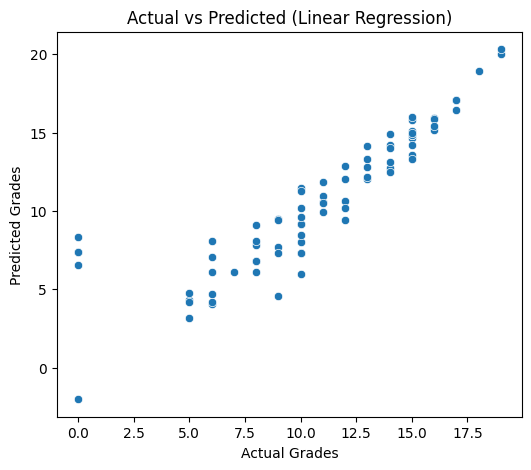

In [11]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()